In [1]:
import numpy as np
import matplotlib.pyplot as plt
import icarogw

Config not imported, automatically decides between Numpy and Cupy
Error in importing cupy


/home/simone.mastrogiovanni/.conda/envs/igwdev/lib/python3.10/site-packages/ligo/lw/lsctables.py:89: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal
/home/simone.mastrogiovanni/.conda/envs/igwdev/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
np.empty(10)*np.nan

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [2]:
pl = icarogw.wrappers.massprior_PowerLaw()
pmevol = icarogw.wrappers.mixed_mass_redshift_evolving(pl)

In [3]:
pmevol.update(mmin=5., mmax=80.,alpha=3.,zt=1., delta_zt=.2, mu_z0=30., 
              mu_z1=3., sigma_z0=5., sigma_z1=3.)

0.9990022727520703


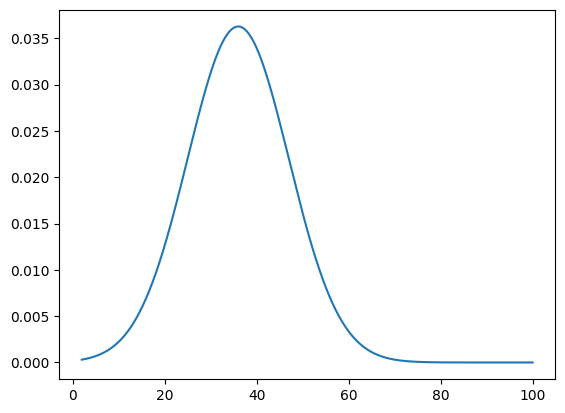

In [4]:
mass_array=np.linspace(2,100,10000)
z_array=np.ones_like(mass_array)*2

pdf = pmevol.pdf(mass_array,z_array)
plt.plot(mass_array,pdf)
print(np.trapz(pdf,mass_array))

In [5]:
wz=icarogw.priors._lowpass_filter(z_array,pmevol.zt,pmevol.delta_zt)
print(wz)

[0. 0. 0. ... 0. 0. 0.]


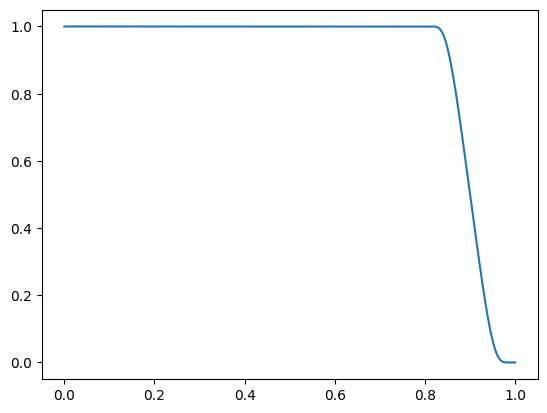

In [15]:
zz = np.linspace(0,1,1000)
plt.plot(zz,icarogw.priors._lowpass_filter(zz,pmevol.zt,pmevol.delta_zt))

In [2]:
PLG = icarogw.priors.PowerLawGaussian(minpl=1.,
    maxpl=100.,
    alpha=-2.,
    lambdag=0.1,
    meang=35.,
    sigmag=5.,
    ming=1.,
    maxg=100.)

PLGdip = icarogw.priors.SmoothedPlusDipProb(PLG,
    bottomsmooth=0.5,
    topsmooth=4.,
    leftdip=3.,
    rightdip=5.,
    leftdipsmooth=0.5,
    rightdipsmooth=0.5,
    deep=0)

/home/simone/github_repo/icarogw_developers/icarogw/priors.py:104: RuntimeWarning: overflow encountered in exp
  effe_prime[select_window] = xp.exp(xp.nan_to_num((delta_m/mprime[select_window])+(delta_m/(mprime[select_window]-delta_m))))
/home/simone/github_repo/icarogw_developers/icarogw/priors.py:62: RuntimeWarning: overflow encountered in exp
  effe_prime[select_window] = xp.exp(xp.nan_to_num((delta_max/mprime[select_window])+(delta_max/(mprime[select_window]-delta_max))))
/home/simone/github_repo/icarogw_developers/icarogw/priors.py:652: RuntimeWarning: divide by zero encountered in log
  prob_ret = self.origin_prob.log_pdf(x)+xp.log(highpass_filter)+xp.log(lowpass_filter)+xp.log(notch_filter)-xp.log(self.norm)


(1e-05, 10)

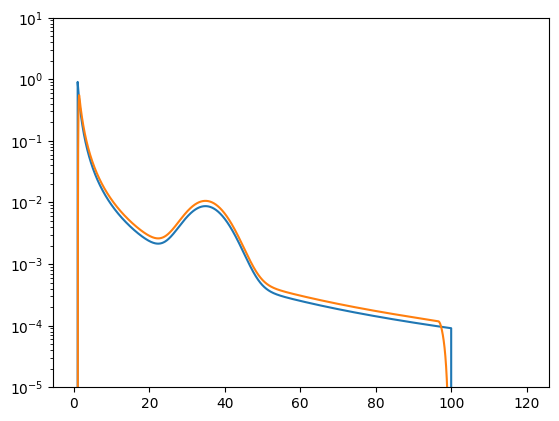

In [3]:
mass_array = np.linspace(0.5,120,10000)
plt.plot(mass_array,PLG.pdf(mass_array))
plt.plot(mass_array,PLGdip.pdf(mass_array))
plt.yscale('log')
plt.ylim([1e-5,10])

/home/simone/github_repo/icarogw_developers/icarogw/priors.py:769: RuntimeWarning: invalid value encountered in log
  toret =xp.log(((xp.power(x,self.alpha+1)-xp.power(self.minpl,self.alpha+1))/(self.alpha+1))/self.norm_fact)
/home/simone/github_repo/icarogw_developers/icarogw/priors.py:957: RuntimeWarning: invalid value encountered in log
  toret = xp.log((0.5*sx.special.erf(max_point)-0.5*sx.special.erf(min_point))/self.norm_fact)
/home/simone/github_repo/icarogw_developers/icarogw/priors.py:1088: RuntimeWarning: divide by zero encountered in log
  toret=xp.log((1-self.lambdag)*self.PL.cdf(x)+self.lambdag*self.TG.cdf(x))
/home/simone/github_repo/icarogw_developers/icarogw/priors.py:702: RuntimeWarning: divide by zero encountered in log
  return xp.log(toret).reshape(origin)


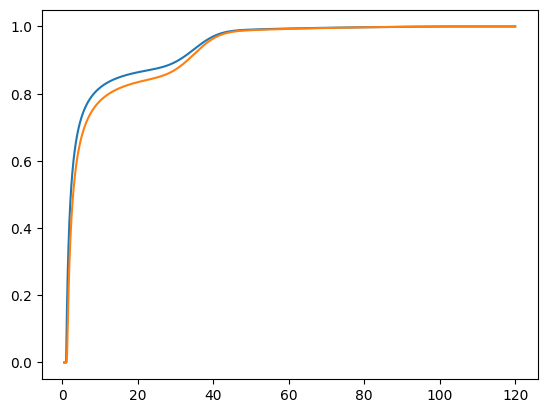

In [4]:
mass_array = np.linspace(0.5,120,10000)
plt.plot(mass_array,PLG.cdf(mass_array))
plt.plot(mass_array,PLGdip.cdf(mass_array))

In [5]:
import corner
import h5py
import seaborn as sns
from scipy.stats import kstest
pal=sns.color_palette('colorblind').as_hex()
import matplotlib.ticker as tck
plt.style.use('classic')
%matplotlib inline
cm = 1/2.54  # centimeters in inches

import numpy as xp

In [6]:
def test_mass_wrapper(mass_wrapper):
    
    mass_arr=np.linspace(mass_wrapper.prior.pdf2.minval+1e-3,mass_wrapper.prior.pdf1.maxval-1e-3,5000)
    m1M,m2M=np.meshgrid(mass_arr,mass_arr)
    
    m1,m2=mass_wrapper.prior.sample(10000)
    
    pdfvals=mass_wrapper.pdf(m1M,m2M)
    
    dM1,dM2=mass_arr[1]-mass_arr[0],mass_arr[1]-mass_arr[0]
    print('The integral is {:.3f}'.format(np.sum(pdfvals)*dM1*dM2))
    
    marginal1=np.sum(pdfvals,axis=0)*dM2
    marginal2=np.sum(pdfvals,axis=1)*dM1
        
    fig=corner.corner(np.column_stack([m1,m2]),hist_kwargs={'density':True},color=pal[1],figsize=(8.8*cm,8.8*cm),dpi=250)
    ax = fig.axes

    ax[0].plot(mass_arr,marginal1,color=pal[0])
    ax[3].plot(mass_arr,marginal2,color=pal[0])
    
    ax[2].set_xlabel(r'$m_1$[$M_{\rm \odot}$]',fontsize=10)
    ax[2].set_ylabel(r'$m_2$[$M_{\rm \odot}$]',fontsize=10)
    ax[3].set_xlabel(r'$m_2$[$M_{\rm \odot}$]',fontsize=10)
    
    for i in [0,2,3]:
        ax[i].yaxis.set_minor_locator(tck.AutoMinorLocator())
        ax[i].xaxis.set_minor_locator(tck.AutoMinorLocator())
        ax[i].tick_params(bottom=True, top=True, left=True, right=True)
        ax[i].tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)

        # We change the fontsize of minor ticks label 
        ax[i].tick_params(axis='both', which='major', labelsize=9)
        ax[i].tick_params(axis='both', which='major', labelsize=9)

In [7]:
def test_mass_wrapper_paired(mass_wrapper):
    
    mass_arr=np.linspace(mass_wrapper.prior.pdf_base.minval+1e-3,mass_wrapper.prior.pdf_base.maxval-1e-3,5000)
    m1M,m2M=np.meshgrid(mass_arr,mass_arr)
    m1,m2=mass_wrapper.prior.sample(10000)  
    pdfvals=mass_wrapper.pdf(m1M,m2M)
    
    dM1,dM2=mass_arr[1]-mass_arr[0],mass_arr[1]-mass_arr[0]
    print('The integral is {:.3f}'.format(np.sum(pdfvals)*dM1*dM2))
    
    marginal1=np.sum(pdfvals,axis=0)*dM2
    marginal2=np.sum(pdfvals,axis=1)*dM1
        
    fig=corner.corner(np.column_stack([m1,m2]),hist_kwargs={'density':True},color=pal[1],figsize=(8.8*cm,8.8*cm),dpi=250)
    ax = fig.axes

    ax[0].plot(mass_arr,marginal1,color=pal[0])
    ax[3].plot(mass_arr,marginal2,color=pal[0])
    
    ax[2].set_xlabel(r'$m_1$[$M_{\rm \odot}$]',fontsize=10)
    ax[2].set_ylabel(r'$m_2$[$M_{\rm \odot}$]',fontsize=10)
    ax[3].set_xlabel(r'$m_2$[$M_{\rm \odot}$]',fontsize=10)
    
    for i in [0,2,3]:
        ax[i].yaxis.set_minor_locator(tck.AutoMinorLocator())
        ax[i].xaxis.set_minor_locator(tck.AutoMinorLocator())
        ax[i].tick_params(bottom=True, top=True, left=True, right=True)
        ax[i].tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)

        # We change the fontsize of minor ticks label 
        ax[i].tick_params(axis='both', which='major', labelsize=9)
        ax[i].tick_params(axis='both', which='major', labelsize=9)

/home/simone/github_repo/icarogw_developers/icarogw/priors.py:769: RuntimeWarning: divide by zero encountered in log
  toret =xp.log(((xp.power(x,self.alpha+1)-xp.power(self.minpl,self.alpha+1))/(self.alpha+1))/self.norm_fact)


The integral is 1.006


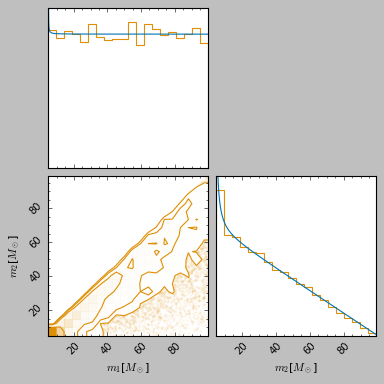

In [8]:
# Power Law
mass_wrapper=icarogw.wrappers.massprior_PowerLaw()
mass_wrapper=icarogw.wrappers.m1m2_conditioned(mass_wrapper)
mass_wrapper.update(alpha=0.0,beta=1.0,mmin=5.,mmax=100.)
test_mass_wrapper(mass_wrapper)

/home/simone/github_repo/icarogw_developers/icarogw/priors.py:957: RuntimeWarning: divide by zero encountered in log
  toret = xp.log((0.5*sx.special.erf(max_point)-0.5*sx.special.erf(min_point))/self.norm_fact)
/home/simone/github_repo/icarogw_developers/icarogw/priors.py:1088: RuntimeWarning: divide by zero encountered in log
  toret=xp.log((1-self.lambdag)*self.PL.cdf(x)+self.lambdag*self.TG.cdf(x))


The integral is 1.084


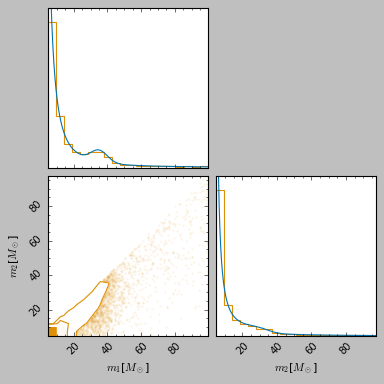

In [9]:
# Power Law Peak
mass_wrapper=icarogw.wrappers.massprior_PowerLawPeak()
mass_wrapper=icarogw.wrappers.m1m2_conditioned(mass_wrapper)
mass_wrapper.update(alpha=2.0,beta=1.0,mmin=5.,mmax=100.,delta_m=5.,mu_g=35.,sigma_g=5.,lambda_peak=0.1)
test_mass_wrapper(mass_wrapper)

/home/simone/github_repo/icarogw_developers/icarogw/priors.py:767: RuntimeWarning: invalid value encountered in log
  toret = xp.log(xp.log(x/self.minval)/self.norm_fact)
/home/simone/github_repo/icarogw_developers/icarogw/priors.py:1142: RuntimeWarning: divide by zero encountered in log
  toret=xp.log((self.PL1.cdf(x)+self.PL2.cdf(x)*


The integral is 1.006


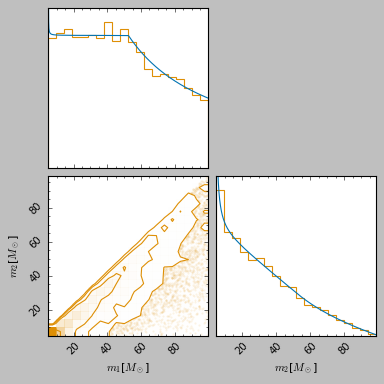

In [10]:
# Broken Power Law
mass_wrapper=icarogw.wrappers.massprior_BrokenPowerLaw()
mass_wrapper=icarogw.wrappers.m1m2_conditioned(mass_wrapper)
mass_wrapper.update(alpha=2.0,beta=1.0,mmin=5.,mmax=100.,alpha_1=0.,alpha_2=1.,b=0.5,delta_m=5.)
test_mass_wrapper(mass_wrapper)

/home/simone/github_repo/icarogw_developers/icarogw/priors.py:1205: RuntimeWarning: divide by zero encountered in log
  return xp.log(pl_part+g_part)


The integral is 1.047


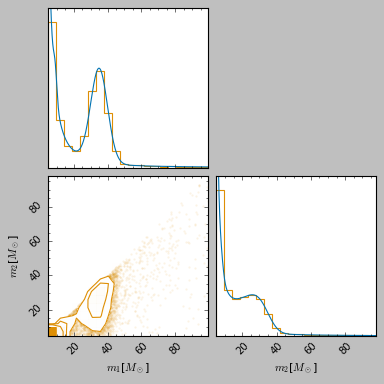

In [11]:
# Multi Peak
mass_wrapper=icarogw.wrappers.massprior_MultiPeak()
mass_wrapper=icarogw.wrappers.m1m2_conditioned(mass_wrapper)
mass_wrapper.update(alpha=2.0,beta=1.0,mmin=5.,mmax=100.,delta_m=5.,mu_g_low=9.,sigma_g_low=1.,lambda_g_low=0.05,
                     mu_g_high=35.,sigma_g_high=5.,lambda_g=0.5)
test_mass_wrapper(mass_wrapper)

/home/simone/github_repo/icarogw_developers/icarogw/priors.py:104: RuntimeWarning: overflow encountered in exp
  effe_prime[select_window] = xp.exp(xp.nan_to_num((delta_m/mprime[select_window])+(delta_m/(mprime[select_window]-delta_m))))
/home/simone/github_repo/icarogw_developers/icarogw/priors.py:517: RuntimeWarning: divide by zero encountered in log
  prob_ret =self.origin_prob.log_pdf(x)+xp.log(window)-xp.log(self.norm)
/home/simone/github_repo/icarogw_developers/icarogw/priors.py:553: RuntimeWarning: divide by zero encountered in log
  return xp.log(toret).reshape(origin)
/home/simone/github_repo/icarogw_developers/icarogw/priors.py:422: RuntimeWarning: invalid value encountered in subtract
  y=self.pdf1.log_pdf(x1)+self.pdf2.log_pdf(x2)-self.pdf2.log_cdf(x1)


The integral is 1.002


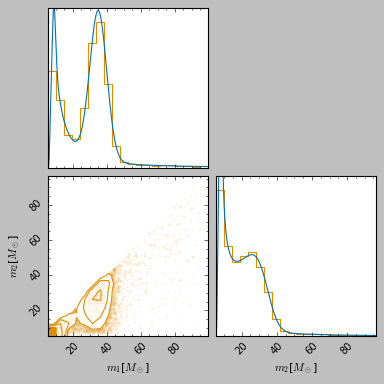

In [12]:
# Multi Peak
mass_wrapper=icarogw.wrappers.massprior_MultiPeak()
mass_wrapper=icarogw.wrappers.m1m2_conditioned_lowpass(mass_wrapper)
mass_wrapper.update(alpha=2.0,beta=1.0,mmin=5.,mmax=100.,delta_m=5.,mu_g_low=9.,sigma_g_low=1.,lambda_g_low=0.05,
                     mu_g_high=35.,sigma_g_high=5.,lambda_g=0.5)
test_mass_wrapper(mass_wrapper)

The integral is 1.008


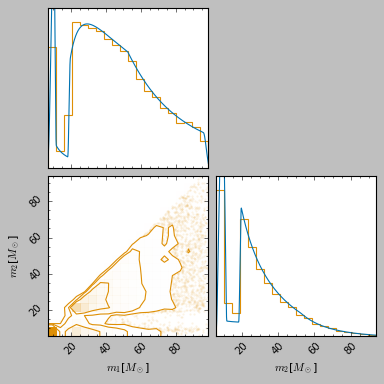

In [19]:
# Broken Power Law
mass_wrapper=icarogw.wrappers.massprior_BrokenPowerLaw()
mass_wrapper=icarogw.wrappers.m1m2_paired_massratio_dip(mass_wrapper)
mass_wrapper.update(beta=1.0,mmin=5.,mmax=100.,alpha_1=1.,alpha_2=2.,b=0.5,bottomsmooth=5,
    topsmooth=5.,
    leftdip=10.,
    rightdip=20.,
    leftdipsmooth=2.,
    rightdipsmooth=2.,
    deep=0.9)
test_mass_wrapper_paired(mass_wrapper)

In [16]:
mass_wrapper.prior.pdf_base